In [22]:
import os
import sys
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from scipy.io import loadmat
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import shutil
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [7]:
# load the train and test data

train = loadmat('../Data/train_32x32.mat')
test = loadmat('../Data/test_32x32.mat')

In [9]:
# loading the images and labels as arrays

train_img = np.array(train['X'])
test_img = np.array(test['X'])

train_labels = train['y']
test_labels = test['y']

In [10]:
train_img = np.moveaxis(train_img, 3, 0)
test_img = np.moveaxis(test_img, 3, 0)

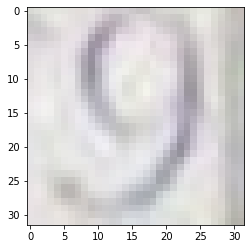

Image label:  [9]


In [13]:
# check out in image
# plot a random image and its label

plt.imshow(train_img[73256])
plt.show()

print('Image label: ', train_labels[73256])

In [17]:
# one-hot encoding of train and test labels

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [29]:
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(train_img, train_labels, test_size=0.15, random_state=42)

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, input_shape=(32, 32, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, 3, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, 3, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(128, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, 3, padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

In [26]:
early_stopping = EarlyStopping(patience=5)

model.compile(optimizer=Adam(learning_rate=0.01, amsgrad=True), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)       

In [32]:
report = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                   epochs=28,
                   validation_data=(X_valid, y_valid),
                   callbacks=[early_stopping],
                   verbose=2)

Epoch 1/28
487/487 - 169s - loss: 0.3729 - accuracy: 0.8911 - val_loss: 0.2944 - val_accuracy: 0.9111
Epoch 2/28
487/487 - 200s - loss: 0.3539 - accuracy: 0.8959 - val_loss: 0.2299 - val_accuracy: 0.9354
Epoch 3/28
487/487 - 214s - loss: 0.3351 - accuracy: 0.9032 - val_loss: 0.2419 - val_accuracy: 0.9330
Epoch 4/28
487/487 - 211s - loss: 0.3255 - accuracy: 0.9056 - val_loss: 0.2363 - val_accuracy: 0.9349
Epoch 5/28
487/487 - 216s - loss: 0.3137 - accuracy: 0.9098 - val_loss: 0.2348 - val_accuracy: 0.9356
Epoch 6/28
487/487 - 193s - loss: 0.2996 - accuracy: 0.9146 - val_loss: 0.2394 - val_accuracy: 0.9323
Epoch 7/28
487/487 - 194s - loss: 0.2863 - accuracy: 0.9178 - val_loss: 0.2254 - val_accuracy: 0.9359
Epoch 8/28
487/487 - 196s - loss: 0.2814 - accuracy: 0.9198 - val_loss: 0.2109 - val_accuracy: 0.9422
Epoch 9/28
487/487 - 197s - loss: 0.2738 - accuracy: 0.9221 - val_loss: 0.2187 - val_accuracy: 0.9408
Epoch 10/28
487/487 - 197s - loss: 0.2657 - accuracy: 0.9240 - val_loss: 0.2128 - 